**Step 1: Imports & Dataset Load**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv('mechanical_machine_fault_data.csv')
df.head()

,Machine_ID,RPM,Temperature_C,Vibration_mm_s,Oil_Quality_Index,Pressure_bar,Shaft_Misalignment_deg,Noise_dB,Load_%,Ambient_Temp_C,Humidity_%,Power_kW,Maintenance_Score,Operating_Hours,Fault
0,M4,1521,77.987529,1.632913,65.212943,6.146028,0.466323,65.447683,71.627966,17.513838,50.153923,51.868267,8,6566,0
1,M5,1645,67.482089,2.040998,75.737674,2.162494,0.434798,71.827039,84.950303,28.632558,28.281687,48.687122,7,8913,0
2,M3,1596,70.736424,2.228640,97.921443,4.983390,0.578073,52.806399,56.870315,28.468531,50.270604,56.406917,6,5190,0
3,M5,1544,86.484457,2.727911,93.419708,4.894181,0.469219,58.873687,73.939752,32.922472,33.521277,40.551483,2,4340,1
4,M5,1341,76.132704,2.352253,59.407108,4.546364,0.435923,48.107842,61.977282,21.049915,43.624499,47.894349,6,9112,0


**Step 2: Basic Dataset Overview**

In [2]:
# Dataset dimensions
print(f"Shape: {df.shape}")

# Data types and missing values
df.info()

# Summary statistics
df.describe().T

Shape: (1000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Machine_ID              1000 non-null   object 
 1   RPM                     1000 non-null   int64  
 2   Temperature_C           1000 non-null   float64
 3   Vibration_mm_s          1000 non-null   float64
 4   Oil_Quality_Index       1000 non-null   float64
 5   Pressure_bar            1000 non-null   float64
 6   Shaft_Misalignment_deg  1000 non-null   float64
 7   Noise_dB                1000 non-null   float64
 8   Load_%                  1000 non-null   float64
 9   Ambient_Temp_C          1000 non-null   float64
 10  Humidity_%              1000 non-null   float64
 11  Power_kW                1000 non-null   float64
 12  Maintenance_Score       1000 non-null   int64  
 13  Operating_Hours         1000 non-null   int64  
 14  Fault                  

,count,mean,std,min,25%,50%,75%,max
RPM,1000.0,1513.396000,200.845837,915.000000,1378.000000,1511.000000,1641.000000,2138.000000
Temperature_C,1000.0,75.189320,9.747296,44.804878,68.726462,75.048989,81.726456,106.377485
Vibration_mm_s,1000.0,2.005950,0.512541,0.504432,1.644938,2.009305,2.347626,3.963119
Oil_Quality_Index,1000.0,79.079614,14.698495,34.885515,69.274679,79.483004,88.781759,128.646395
Pressure_bar,1000.0,4.978744,0.992929,1.823296,4.340335,4.980053,5.652856,8.112910
Shaft_Misalignment_deg,1000.0,0.491806,0.204093,-0.079903,0.350442,0.488650,0.634795,1.119660
Noise_dB,1000.0,59.838900,5.296050,41.558174,56.200772,59.802279,63.480561,77.645276
Load_%,1000.0,70.347228,10.410986,31.633445,63.613522,70.115338,77.304023,103.773829
Ambient_Temp_C,1000.0,25.048963,4.823859,10.990442,21.926873,25.135419,28.347842,40.788856
Humidity_%,1000.0,39.824784,9.581265,0.775997,33.200325,40.025548,46.044242,69.141092


**Step 3: Missing Values & Duplicates**

In [3]:
# Missing values
print(df.isnull().sum())

# Check duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Machine_ID                0
RPM                       0
Temperature_C             0
Vibration_mm_s            0
Oil_Quality_Index         0
Pressure_bar              0
Shaft_Misalignment_deg    0
Noise_dB                  0
Load_%                    0
Ambient_Temp_C            0
Humidity_%                0
Power_kW                  0
Maintenance_Score         0
Operating_Hours           0
Fault                     0
dtype: int64
Duplicate rows: 0


- no null data & duplicate datas

**Step 4: Target Variable Distribution (Fault)**

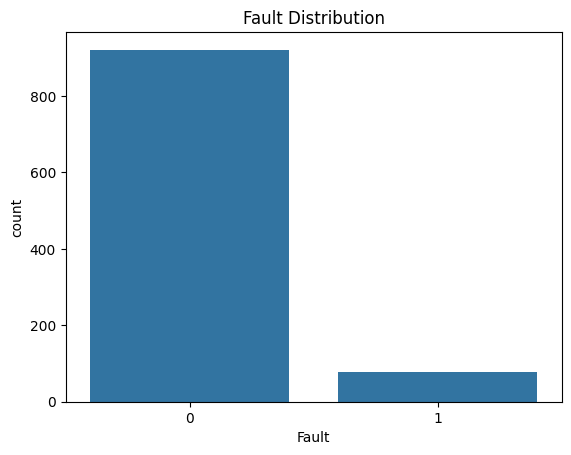

Fault
0    92.1
1     7.9
Name: proportion, dtype: float64


In [4]:
# Target distribution
sns.countplot(x='Fault', data=df)
plt.title('Fault Distribution')
plt.show()

# Percentage breakdown
fault_counts = df['Fault'].value_counts(normalize=True) * 100
print(fault_counts)

**Step 5: Correlation Heatmap**

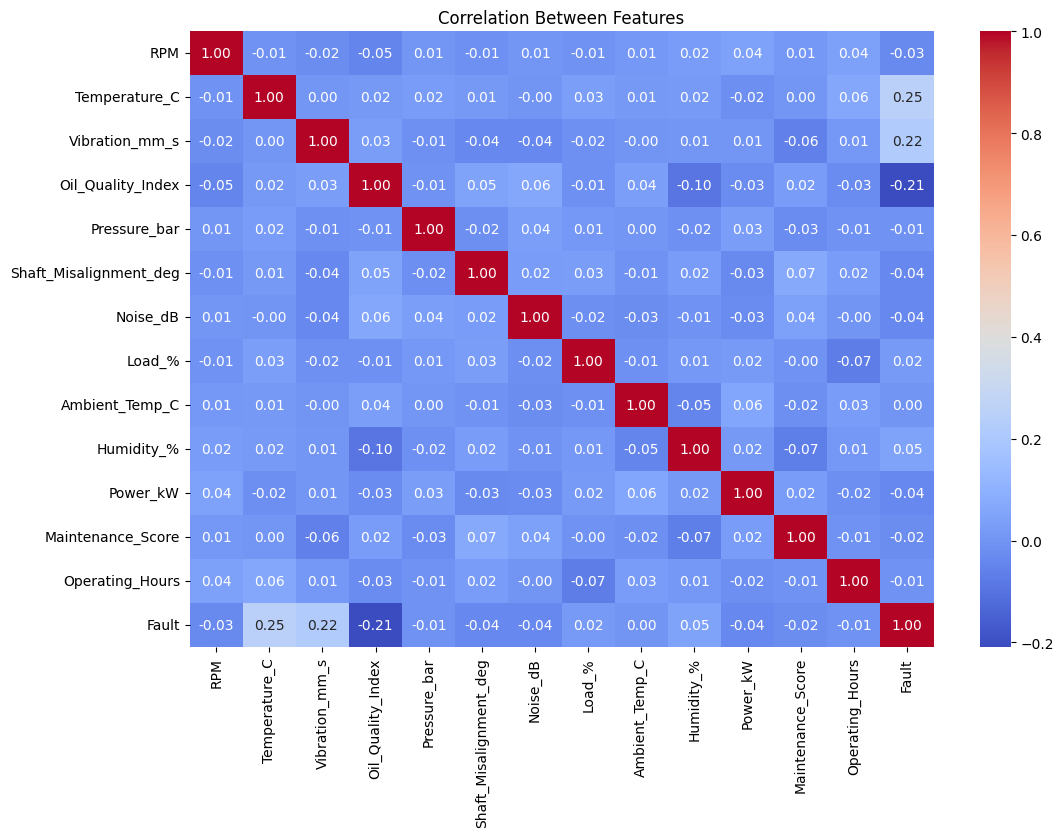

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


**Step 6: Univariate Analysis (Boxplots)**

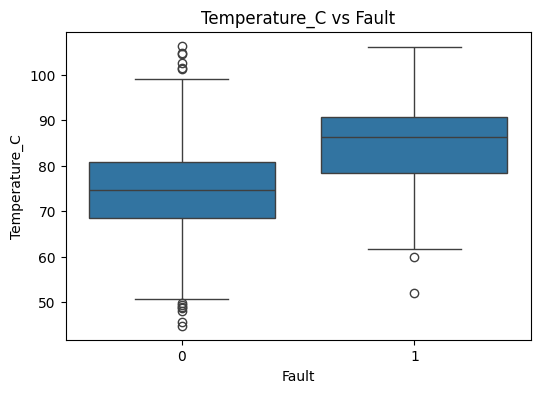

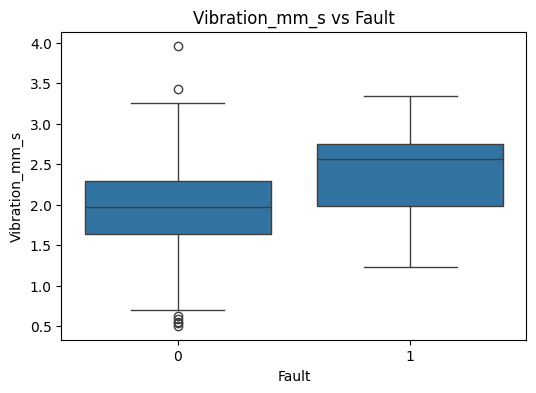

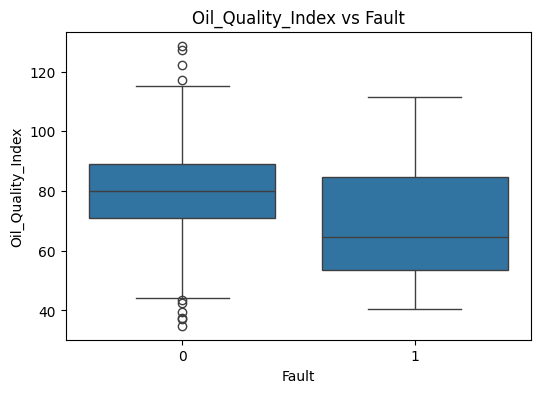

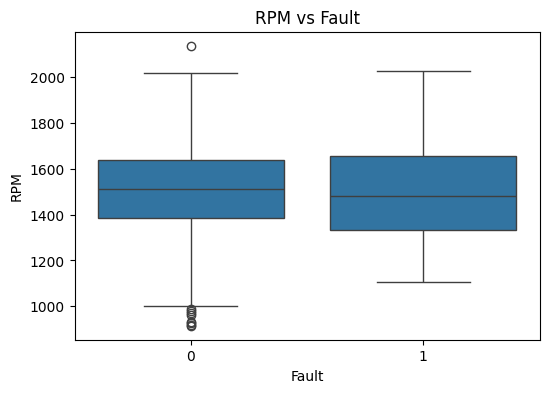

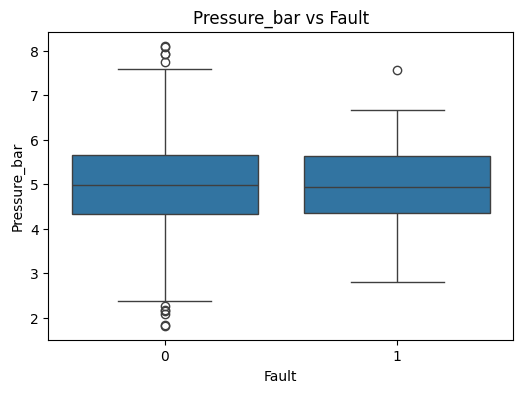

In [6]:
features = ['Temperature_C', 'Vibration_mm_s', 'Oil_Quality_Index', 'RPM', 'Pressure_bar']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Fault', y=feature, data=df)
    plt.title(f'{feature} vs Fault')
    plt.show()

**Step 7: Multivariate Patterns with Plotly**

In [ ]:
#pip install -U nbformat

Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
fig = px.scatter_matrix(df,
                        dimensions=['Temperature_C', 'Vibration_mm_s', 'Oil_Quality_Index', 'RPM'],
                        color='Fault',
                        title="Sensor Data Scatter Matrix Colored by Fault")
fig.show()

**Step 8: Machine-wise Fault Distribution**

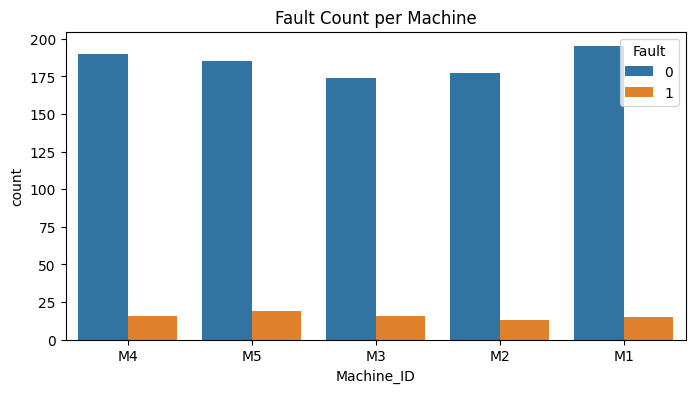

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='Machine_ID', hue='Fault', data=df)
plt.title('Fault Count per Machine')
plt.show()

**Step 9: Operating Hours vs Fault**

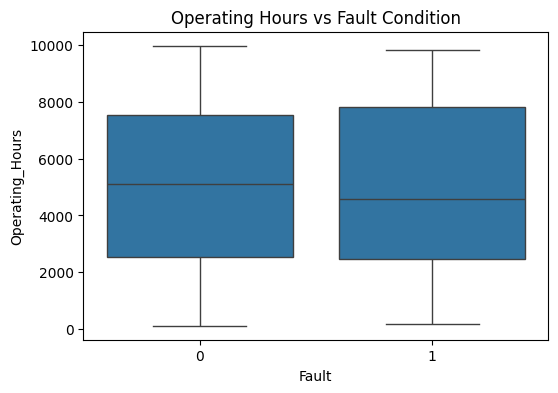

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Fault', y='Operating_Hours', data=df)
plt.title('Operating Hours vs Fault Condition')
plt.show()